<a href="https://colab.research.google.com/github/james-monahan/Stats_Calc_Workshop/blob/main/Math2_solving_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sympy import Symbol
from sympy.solvers import solve
from math import e


##Equation Solver

In [ ]:
x = Symbol('x')

In [ ]:
solve(x ** 2 - 7 * x ** 2 + 15 * x - 9, x)

[1, 3/2]

In [ ]:
solve(3 * e ** (x + 2) + 3 - 2 * (e ** x + 100), x)

[2.27914777845756]

##Sample break even analysis

In [ ]:
#variables
monthly_costs = 1312.13
sell_price = 8.99
sell_cost = 6.56
avg_sales = 400

In [ ]:
#sales needed to break even
solve(x * (sell_price - sell_cost) - monthly_costs)

[539.971193415638]

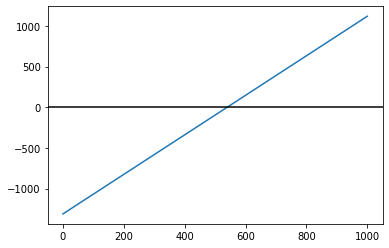

In [ ]:
#plot sales needed
xs = np.linspace(0, 1000, 1000)
plt.plot(xs, (sell_price - sell_cost) * xs - monthly_costs)
plt.axhline(0, c='k')
plt.show()

In [ ]:
#price needed at average sales even
solve(avg_sales * (x-sell_cost) - monthly_costs)

[9.84032500000000]

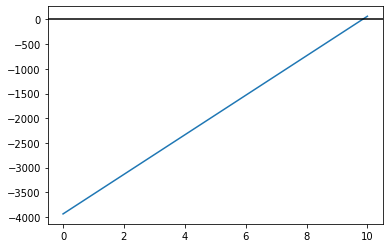

In [ ]:
#plot price needed
xs = np.linspace(0, 10, 1000)
plt.plot(xs, avg_sales * xs - ((avg_sales*sell_cost)+monthly_costs))
plt.axhline(0, c='k')
plt.show()

#Solving systems of equations

In [11]:
from numpy.linalg import inv
from numpy.linalg import inv, LinAlgError

In [4]:
def solve_eq_sys(coeff_matrix, c):
    inv_matrix = inv(coeff_matrix)
    return inv_matrix.dot(c)

In [8]:
coeff_matrix = np.array([[1, 3, -2],
                         [3, 5, 6],
                         [2, 4, 3]])
c = np.array([1, 31, 19])
solve_eq_sys(coeff_matrix, c)

array([1., 2., 3.])

In [17]:
# row 3 = row 1 x 2 'singular matrix'
# inv(np.array([[1, 3, -2],\
#               [3, 5, 6],\
#                [2, 6, -4]]))

In [14]:
def solve_eq_sys(coeff_matrix, c):
    try:
        inv_matrix = inv(coeff_matrix)
        return inv_matrix.dot(c)
    except LinAlgError:
        return False

In [15]:
coeff_matrix = np.array([[1, 3, -2],\
                         [3, 5, 6],\
                         [2, 6, -4]])
c = np.array([1, 31, 19])
solve_eq_sys(coeff_matrix, c)

False

#Systems of non-linear equations

In [18]:
x = Symbol('x')
y = Symbol('y')

In [22]:
solve([x + y - 5, x ** 2 - x + 2 * y - 8], x,y)

[(1, 4), (2, 3)]

In [23]:
solve([x ** 2 - 2 * x - y ** 2 + 1, x ** 2 - 2 * y - 1],x, y)

[(-3, 4), (1, 0)]

#Sample break even multi-variable

In [28]:
#variables
monthly_costs = 1312.13
sell_price = 8.99
sell_cost = 6.56
avg_sales = 400
monthly_revenue = 4000
demand = monthly_revenue/sell_price

x = Symbol('x')  # to be sold
y = Symbol('y')  # price 

In [30]:
# x = units sold
# y = sell price
solve([x * (y - sell_cost) - monthly_costs,x * y - monthly_revenue])

[{x: 409.736280487805, y: 9.76237690066856}]

In [32]:
def get_profit(x, y):
  demand = monthly_revenue/y
  if x > demand:
    return monthly_revenue - x * sell_cost - monthly_costs
  return x * (y - sell_cost) - monthly_costs

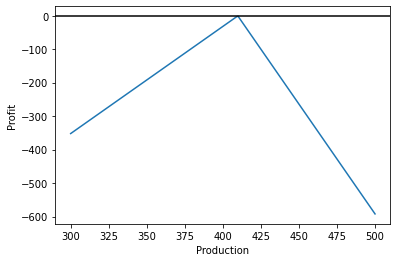

In [34]:
xs = [i for i in range(300, 501)]
profits_976 = [get_profit(x, 9.76) for x in xs]
plt.plot(xs, profits_976)
plt.axhline(0, c='k')
plt.xlabel('Production')
plt.ylabel('Profit')
plt.show()

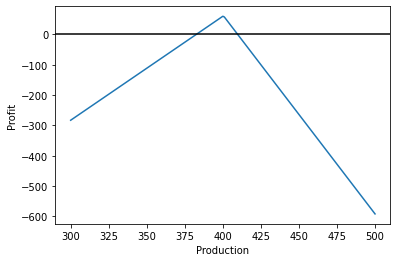

In [35]:
xs = [i for i in range(300, 501)]
profits_999 = [get_profit(x, 9.99) for x in xs]
plt.plot(xs, profits_999)
plt.axhline(0, c='k')
plt.xlabel('Production')
plt.ylabel('Profit')
plt.show()

In [36]:
xs = [i for i in range(300, 501, 2)]
ys = np.linspace(5, 10, 100)
profits = [[get_profit(x, y) for y in ys] for x in xs]

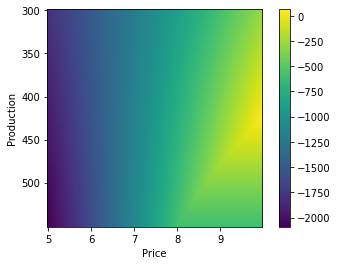

In [42]:
#relationship between price and production given demand
plt.imshow(profits)
plt.colorbar()
plt.xticks([0, 20, 40, 60, 80],\
           [5, 6, 7, 8, 9, 10])
plt.xlabel('Price')
plt.yticks([0, 20, 40, 60, 80],\
           [300, 350, 400, 450, 500])
plt.ylabel('Production')
plt.show()